# 3. Plotting the Exploratory Data Analysis
# (3.1) Basic Terminology


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#load iris.csv file into a panda data frame
iris = pd.read_csv('Iris_1.csv')
#iris = pd.read_csv('Iris.csv')

In [3]:
print(iris.shape)
print(iris.columns)

(150, 6)
Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')


In [4]:
print(iris.columns)
remove_columns = ['Id']
iris.drop(remove_columns, inplace = True, axis=1)
print(iris.columns)

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')
Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')


In [5]:
#Q: How many data points for each class are present?
#Q: How many flowers for each species are present
iris['Species'].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Species, dtype: int64

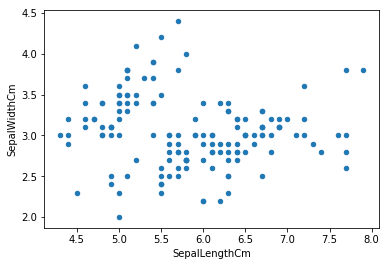

In [6]:
iris.plot(kind = 'scatter', x = 'SepalLengthCm', y = 'SepalWidthCm')

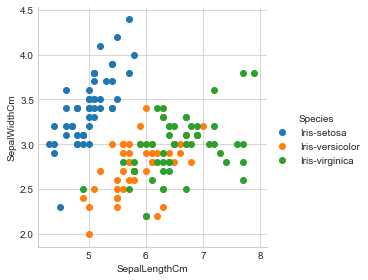

In [7]:
# 2D Scatter plot with color coding for each flower type/class
# here sns corresponds to seaborn.
# key values : plt.scatter
sns.set_style('whitegrid');
sns.FacetGrid(iris, hue="Species", size=4) \
   .map(plt.scatter,'SepalLengthCm', 'SepalWidthCm') \
   .add_legend();
plt.show();

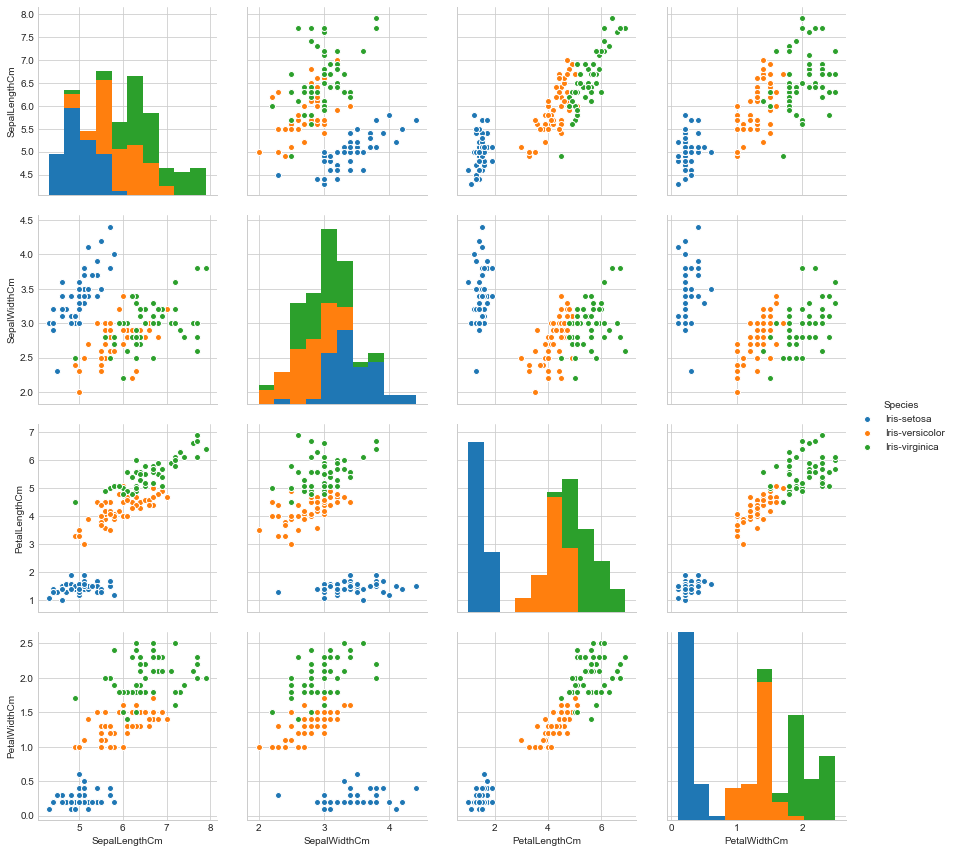

In [11]:
plt.close() #close currently open plot
sns.set_style('whitegrid') #set grid style
sns.pairplot(iris, hue = 'Species', size = 3) # pairplot with legend = species
plt.show()

In [35]:
iris_setosa = iris.loc[iris['Species'] == 'Iris-setosa']
iris_versicolor = iris.loc[iris['Species'] == 'Iris-versicolor']
iris_virginica = iris.loc[iris['Species'] == 'Iris-virginica']
iris_setosa.shape[0]

50

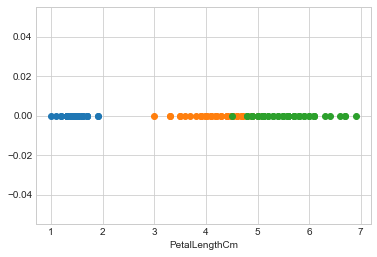

In [48]:
plt.close()
plt.plot(iris_setosa['PetalLengthCm'], np.zeros(iris_setosa.shape[0]), 'o')
plt.plot(iris_versicolor['PetalLengthCm'], np.zeros(iris_versicolor.shape[0]), 'o')
plt.plot(iris_virginica['PetalLengthCm'], np.zeros(iris_virginica.shape[0]), 'o')
plt.xlabel('PetalLengthCm')
plt.show()

In [ ]:
# Overlapping points is hard to read
# we can modify like following histogram
# key poits changing here : sns.distplot

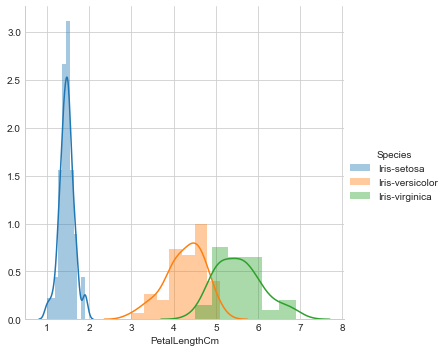

In [49]:
sns.FacetGrid(iris, hue = 'Species', size = 5).map(sns.distplot, 'PetalLengthCm').add_legend();
plt.show()

In [ ]:
#cumulative probability distribution

[0.02 0.02 0.04 0.14 0.24 0.28 0.14 0.08 0.   0.04]
[1.   1.09 1.18 1.27 1.36 1.45 1.54 1.63 1.72 1.81 1.9 ]
[0.02 0.04 0.08 0.22 0.46 0.74 0.88 0.96 0.96 1.  ]


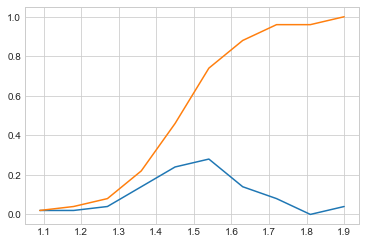

In [66]:
counts, bin_edges = np.histogram(iris_setosa['PetalLengthCm'], bins =10, density = True)
pdf = counts / sum(counts)
print(pdf)
print(bin_edges)

cdf = np.cumsum(pdf)
print(cdf)

# bin edges have shape 11, while pdf has shape 10 why?
#because pdf is the cumulative of pdf so for an array of [1,2,3] cdf will be [1+2, 2+3]

plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)
plt.show()

[0.02 0.02 0.04 0.14 0.24 0.28 0.14 0.08 0.   0.04]
[0.02 0.04 0.08 0.22 0.46 0.74 0.88 0.96 0.96 1.  ]


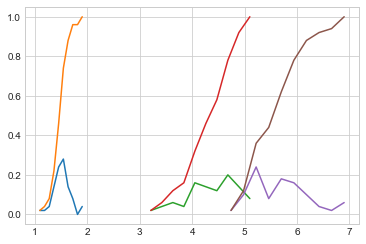

In [78]:
#Setosa
iris_setosa['PetalLengthCm']
counts, bin_edges = np.histogram(iris_setosa['PetalLengthCm'], bins = 10, density = True)
pdf = counts / sum(counts)
print(pdf)

cdf = np.cumsum(pdf)
print(cdf)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)

#Versicolor
iris_versicolor['PetalLengthCm']
counts, bin_edges = np.histogram(iris_versicolor['PetalLengthCm'], bins = 10, density = True)
pdf = counts / sum(counts)
cdf = np.cumsum(pdf)

plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)

#Virginica
iris_virginica['PetalLengthCm']
counts, bin_edges = np.histogram(iris_virginica['PetalLengthCm'], bins= 10, density = True)
pdf = counts/ sum(counts)
cdf = np.cumsum(pdf)

plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)


plt.show()


# (3) BoxPlot


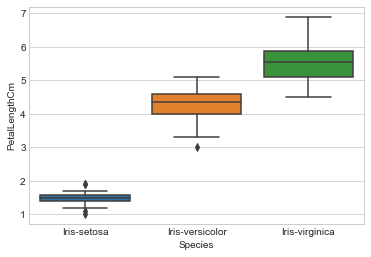

In [80]:
sns.boxplot(x ='Species', y = 'PetalLengthCm', data = iris)
plt.show()

#  ViolinPlot

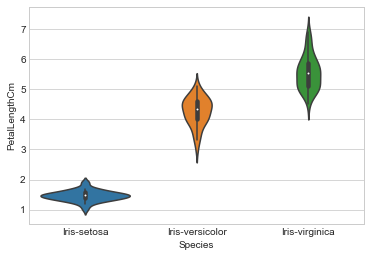

In [82]:
sns.violinplot(x = 'Species', y = 'PetalLengthCm', data = iris)
plt.show()

# multivariate probability distribution

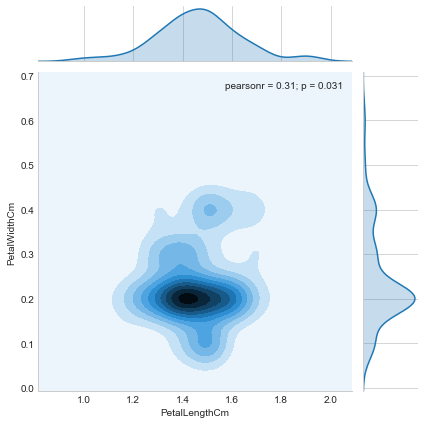

In [85]:
sns.jointplot(x = 'PetalLengthCm', y = 'PetalWidthCm', data = iris_setosa, kind = 'kde')
plt.show()